Two main tasks for this notebook. 
1) Plot brand gender against category usage gender. 
2) 1d jitter plot of brands against heshe axis
3) Get better unstanding of the gender-classifying algorithm.

In [15]:
import gensim.models.keyedvectors as word2vec
import time
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import os
import matplotlib.pyplot as plt
from pylab import *
import scipy
import string

In [42]:
#Plot brand gender against category
# Step 1: Find relative femaleness of each category (what percent is female in each)
# Step 2: Plot what percentage of TOTAL female brands are found in each category
df = pd.read_csv('he_she_category_value_counts.csv', header=None)
df_gloss = pd.read_csv('glossary.csv')
df = df[df[0] != 'BASELINE']
df_sums = df.groupby(0).sum()
df_female = df[df[1] == 'F']
missing = set(df_sums.index.tolist()).difference(set(df_female[0].tolist()))
for item in missing:
    df_female = df_female.append({0: item, 1: 'F', 2: 0}, ignore_index=True)
df_joined = pd.merge(df_sums, df_female, on=0)
df_joined['brand_femaleness'] = df_joined['2_y'] / df_joined['2_x']
df_joined = df_joined.sort_values(by='brand_femaleness')
if df_gloss.shape[0] == df_joined.shape[0]:
   df_joined['category_femaleness'] = df_gloss['category_femaleness']
else:
    print("What in heck")
    
df_joined

# total_female = df_female.sum()[2]
# df_joined['brand_femaleness'] = df_joined['2_y'] / total_female
# df_joined


,key_0,2_x,1,2_y,brand_femaleness,category_femaleness
9,B241 Cable TV Providers & Systems,2,F,0,0.000000,0.40
36,F259 Pasta & Pasta Dishes General Promotion,2,F,0,0.000000,0.60
60,H413 Dishwashing Detergents,3,F,1,0.333333,0.80
71,V365 Sporting Goods Stores,5,F,2,0.400000,0.40
2,A321 Sneakers,17,F,7,0.411765,0.50
51,G511 Elec & Video Games & Sftwr (Excl PC&Net),12,F,5,0.416667,0.20
29,D439 Mens Shaving Equipment & Supplies General...,7,F,3,0.428571,0.40
58,H310 Household Batteries,9,F,4,0.444444,0.15
12,B511 Desktop Computers,9,F,4,0.444444,0.20
70,V363 Toy Stores,2,F,1,0.500000,0.70


In [31]:
# x = set(df_joined['key_0'].tolist())
# l = []
# for index, row in df_gloss.iterrows():
#     l.append("".join([row['code'],row['category'][1:]]))
# x.difference(l)
# df_joined[df_joined['key_0'] == 'D269 Deodorants & Antiperspirants General Promotion']

,key_0,2_x,1,2_y,brand_femaleness
28,D269 Deodorants & Antiperspirants General Prom...,1,F,1,1.0


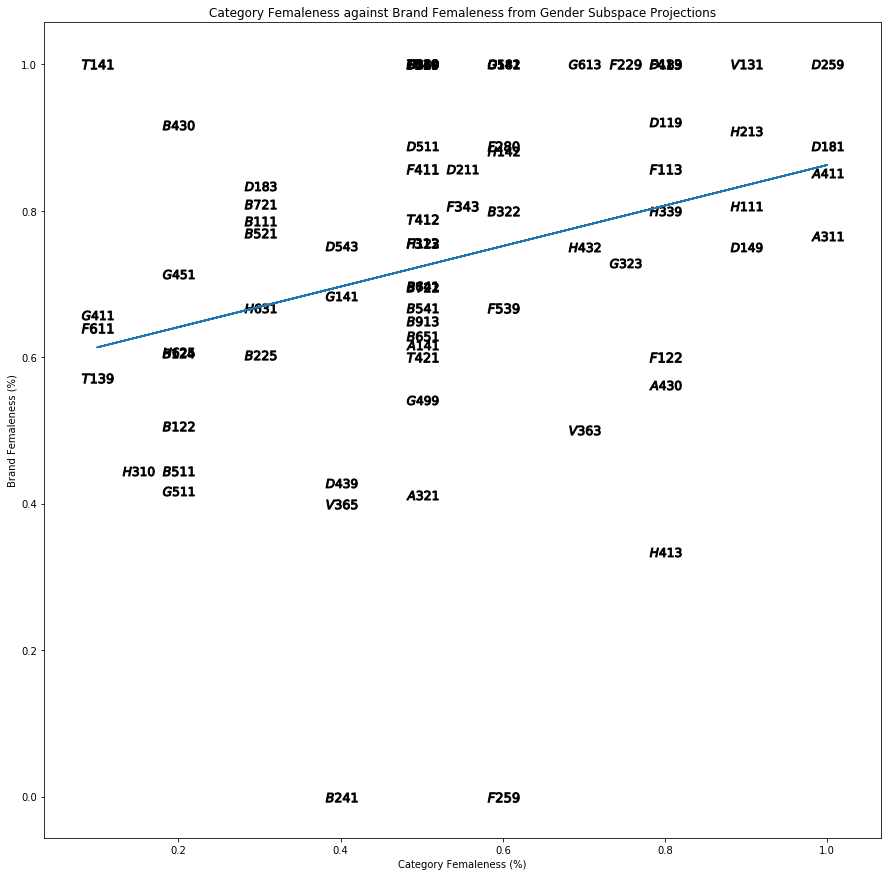

In [43]:
rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
x = []
y = []
for index, row in df_joined.iterrows():
    x.append(row['category_femaleness'])
    y.append(row['brand_femaleness'])
    plt.scatter(row['category_femaleness'], row['brand_femaleness'], c='black', s=1000, marker=r"$ {} $".format(row['key_0'][:5])) 
# plt.ylim(-0.01, 0.08)
plt.xlabel('Category Femaleness (%)')
plt.ylabel('Brand Femaleness (%)')
plt.title('Category Femaleness against Brand Femaleness from Gender Subspace Projections')
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.savefig('category_vs_brand_femaleness.png')
plt.show()

In [ ]:
# df_glossary = pd.DataFrame()
# df_glossary['code'] = df_joined['key_0'].apply(lambda x: x[:5])
# df_glossary['category'] = df_joined['key_0'].apply(lambda x: x[4:])
# df_glossary.sort_values(by='code').to_csv('glossary.csv')
print(x)

In [44]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStd-error: {}".format(slope, intercept, r_value, p_value, std_err))

Slope: 0.2767403989559433
Intercept: 0.5859062768126178
R-value: 0.3087518206842073
P-value: 0.008319932576676473
Std-error: 0.1018965934253711


In [45]:
#Plot brand gender against category when brands that are like names are ommitted
# Step 1: Find relative femaleness of each category (what percent is female in each)
# Step 2: Plot what percentage of TOTAL female brands are found in each category
df_nn = pd.read_csv('he_she_category_value_counts_no_names.csv', header=None)
df_nn = df_nn[df_nn[0] != 'BASELINE']
df_sums_nn = df_nn.groupby(0).sum()
df_female_nn = df_nn[df_nn[1] == 'F']
missing_nn = set(df_sums_nn.index.tolist()).difference(set(df_female_nn[0].tolist()))
for item in missing_nn:
    df_female_nn = df_female_nn.append({0: item, 1: 'F', 2: 0}, ignore_index=True)
df_joined_nn = pd.merge(df_sums_nn, df_female_nn, on=0)
df_joined_nn['brand_femaleness'] = df_joined_nn['2_y'] / df_joined_nn['2_x']
df_joined_nn = df_joined_nn.sort_values(by='brand_femaleness')
df_joined_nn['key_0'] = df_joined_nn['key_0'].apply(lambda x: x[:5])
df_joined_nn.rename(columns={'key_0': 'code'}, inplace=True)
if df_gloss.shape[0] == df_joined.shape[0]:
   df_joined_nn = pd.merge(df_joined_nn, df_gloss, on='code')
else:
    print("What in heck")
df_joined_nn
# total_female_nn = df_female_nn.sum()[2]
# df_joined_nn['brand_femaleness'] = df_joined_nn['2_y'] / total_female_nn
# df_joined_nn




,code,2_x,1,2_y,brand_femaleness,Unnamed: 0,category,category_femaleness
0,B241,2,F,0,0.000000,9,Cable TV Providers & Systems,0.40
1,V365,4,F,1,0.250000,70,Sporting Goods Stores,0.40
2,B511,7,F,2,0.285714,12,Desktop Computers,0.20
3,G511,11,F,4,0.363636,50,Elec & Video Games & Sftwr (Excl PC&Net),0.20
4,T139,7,F,3,0.428571,63,"Vehicles, Sales & Leasing: Comb Copy&NEC",0.10
5,H310,9,F,4,0.444444,57,Household Batteries,0.15
6,A321,6,F,3,0.500000,2,Sneakers,0.50
7,V363,2,F,1,0.500000,69,Toy Stores,0.70
8,H413,2,F,1,0.500000,59,Dishwashing Detergents,0.80
9,H631,4,F,2,0.500000,62,Paint,0.30


<Figure size 432x288 with 0 Axes>

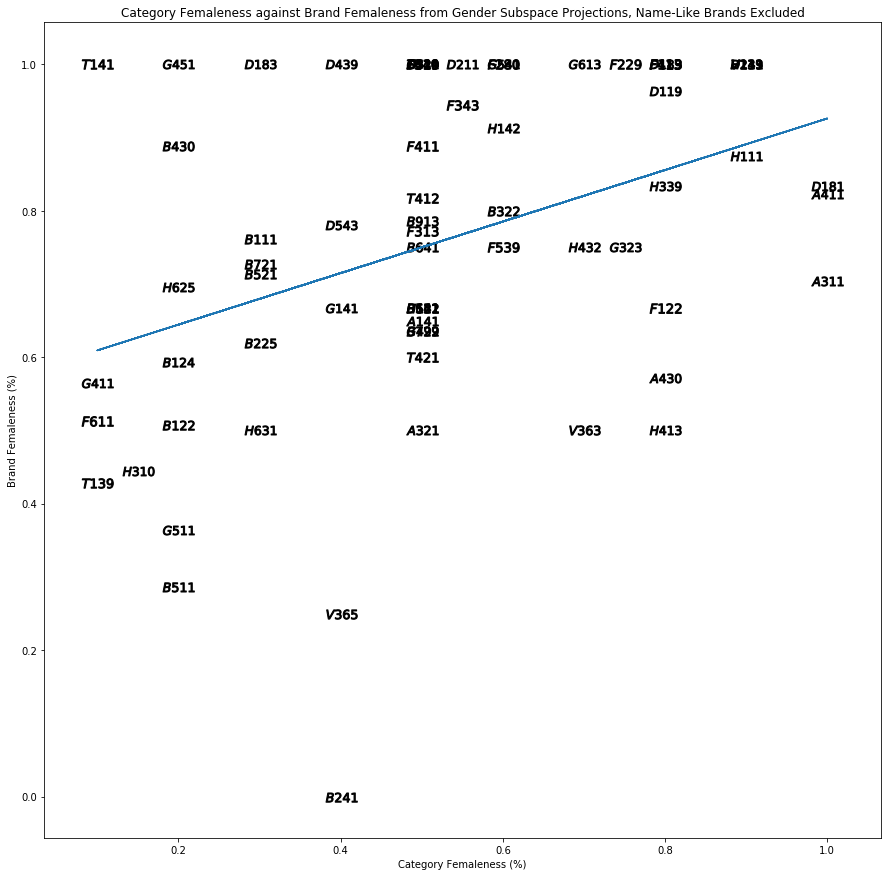

In [46]:
plt.clf()
rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
x_nn = []
y_nn = []
for index, row in df_joined_nn.iterrows():
    x_nn.append(row['category_femaleness'])
    y_nn.append(row['brand_femaleness'])
    plt.scatter(row['category_femaleness'], row['brand_femaleness'], c='black', s=1000, marker=r"$ {} $".format(row['code'][:5])) 
#plt.ylim(-0.01, 0.08)
plt.xlabel('Category Femaleness (%)')
plt.ylabel('Brand Femaleness (%)')
plt.title('Category Femaleness against Brand Femaleness from Gender Subspace Projections, Name-Like Brands Excluded')
plt.plot(x_nn, np.poly1d(np.polyfit(x_nn, y_nn, 1))(x_nn))
plt.savefig('category_vs_brand_femaleness_no_names.png')
plt.show()

In [47]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_nn, y_nn)
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStd-error: {}".format(slope, intercept, r_value, p_value, std_err))

Slope: 0.35201865674588484
Intercept: 0.574188769269569
R-value: 0.3855430725813595
P-value: 0.0011669678161973572
Std-error: 0.1036994725792634
